Titanic - Machine Learning from Disaster
=================================

Titanic sank after colliding with an iceberg. Unfortunately,resulting in the death of 1502 out of 2224 passengers and crew.
While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

Build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).


This notebook is divided into Three section

EDA
Preprocessing/Feature Engineering
Model Building

In [1]:
#Import all the Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
import xgboost as xgb


In [2]:
#reading training and test set 
titanic_train_df=pd.read_csv('train.csv')
titanic_test_df =pd.read_csv('test.csv')


# EDA

In [3]:
#view the shape of the train and test data set

print("the shape of the train set\n",titanic_train_df.shape)
print("the shape of the test set\n",titanic_test_df.shape)

the shape of the train set
 (891, 12)
the shape of the test set
 (418, 11)


in train data set  we have 12 columns as one feature is target feature which we need to predict 
and 11 independent feature .

In [4]:
#columns in the train and test dataset

print("training set columns:\n",titanic_train_df.columns)

print("\ntest set columns:\n",titanic_test_df.columns)



training set columns:
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

test set columns:
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


"Survived" feature in Train set is our Target Feature .

In [5]:
#total no of different datatypes in Train and Test dataset
print("train dataset -total no of different dataypes:\n", titanic_train_df.dtypes.value_counts())
print("\ntest dataset -total no of different dataypes:\n", titanic_test_df.dtypes.value_counts())


train dataset -total no of different dataypes:
 object     5
int64      5
float64    2
dtype: int64

test dataset -total no of different dataypes:
 object     5
int64      4
float64    2
dtype: int64


In [6]:
#total no of not null rows and datatypes of each features in train and test set

print("train  set datatypes and total no of not null row in each feature:\n")
titanic_train_df.info()

print("\n==================================")

print("\ntest  set datatypes and total no of not null row in each feature:\n")
titanic_test_df.info()



train  set datatypes and total no of not null row in each feature:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


test  set datatypes and total no of not null row in each feature:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #

In [7]:
#view top 5 rows of the train set

titanic_train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Visualizing target feature

In [8]:
titanic_train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
titanic_train_df['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

<AxesSubplot:>

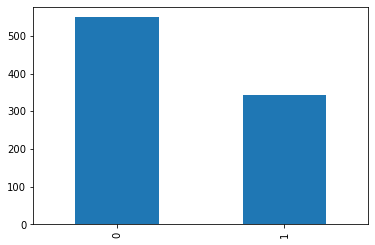

In [10]:
#plot target feature

titanic_train_df['Survived'].value_counts().plot.bar()


Survival rate is very less -38% and Death is 62%

<Figure size 432x288 with 0 Axes>

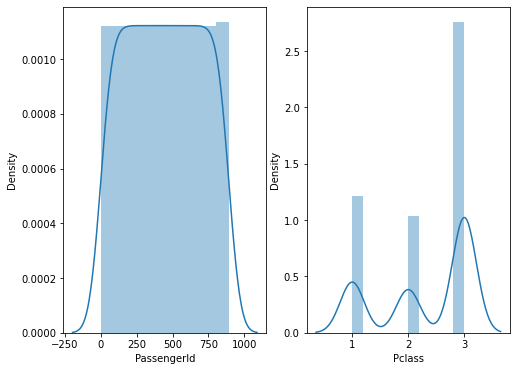

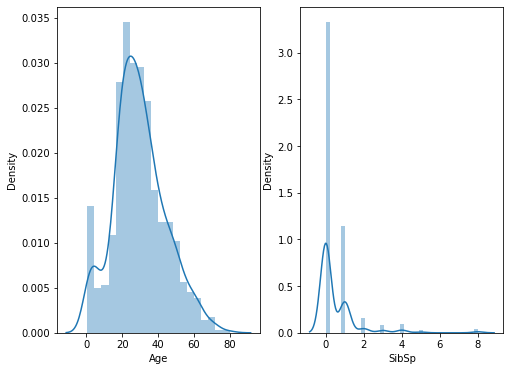

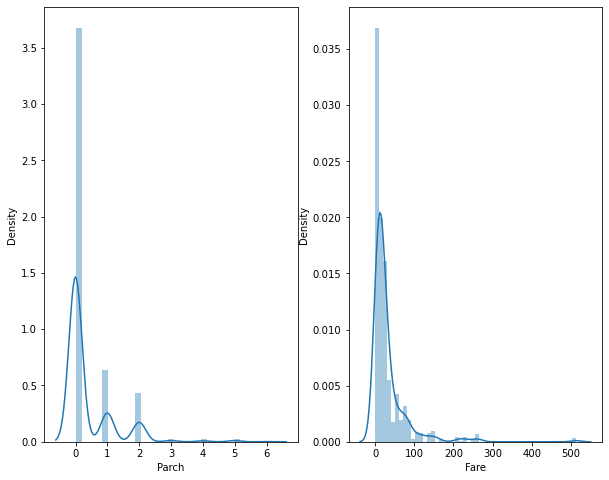

In [11]:
#Visualizing  independent numerical variables

plt.figure(1)
plt.figure(figsize=(8,6))
plt.subplot(121) 
sns.distplot(titanic_train_df['PassengerId'])


plt.subplot(122) 
sns.distplot(titanic_train_df['Pclass'])
plt.show()

plt.figure(figsize=(8,6))
plt.subplot(121) 
sns.distplot(titanic_train_df['Age'])

plt.subplot(122) 
sns.distplot(titanic_train_df['SibSp'])
plt.show()

plt.figure(figsize=(10,8))
plt.subplot(121) 
sns.distplot(titanic_train_df['Parch'])


plt.subplot(122) 
sns.distplot(titanic_train_df['Fare'])
plt.show()



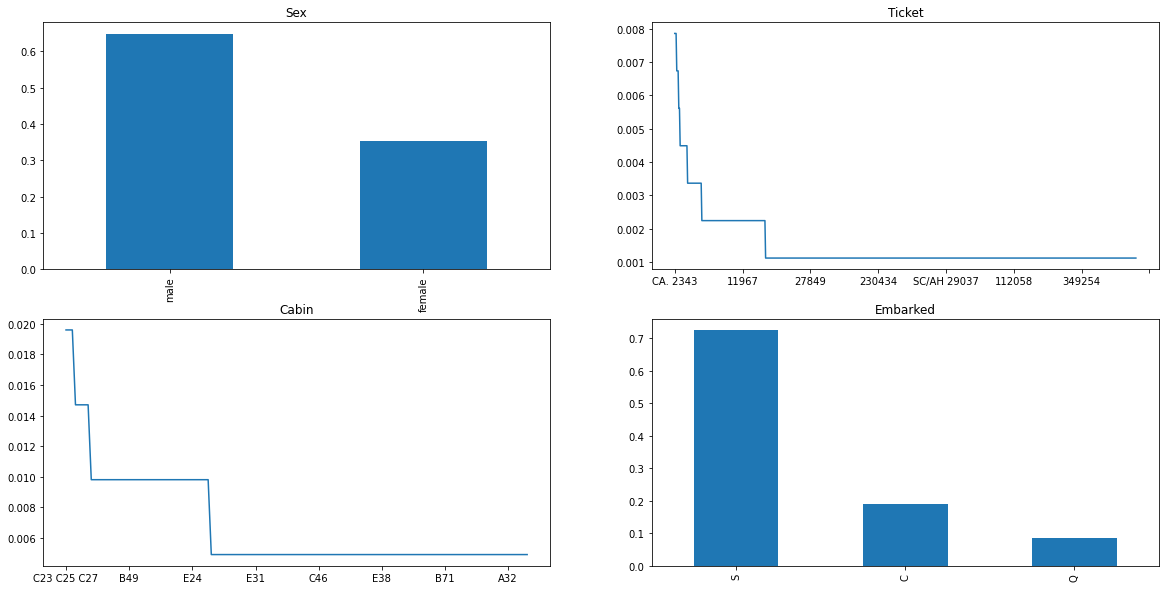

In [12]:

#Visualizing independent catagorical variables

plt.figure(1) 
plt.subplot(221)
titanic_train_df['Sex'].value_counts(normalize=True).plot.bar(figsize=(5,5),title='Sex')
plt.subplot(222) 
titanic_train_df['Ticket'].value_counts(normalize=True).plot(figsize=(20,10),title='Ticket')
plt.subplot(223) 
titanic_train_df['Cabin'].value_counts(normalize=True).plot(title='Cabin')
plt.subplot(224) 
titanic_train_df['Embarked'].value_counts(normalize=True).plot.bar(title='Embarked')
plt.show()

Bivariate analysis

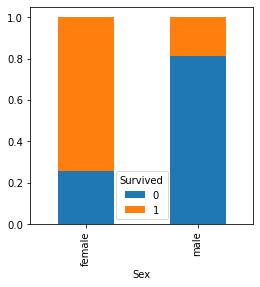

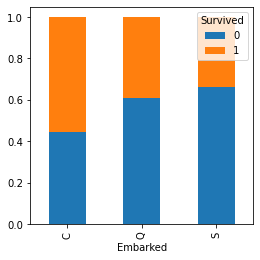

In [13]:
#Bivariate analysis -catagorical variables Vs Target Variable 
Sex = pd.crosstab(titanic_train_df['Sex'],titanic_train_df['Survived'])
Sex.div(Sex.sum(1).astype(float),axis=0).plot(kind="bar",stacked=1,figsize=(4,4))
plt.show()

Embarked = pd.crosstab(titanic_train_df['Embarked'],titanic_train_df['Survived'])
Embarked.div(Embarked.sum(1).astype(float),axis=0).plot(kind="bar",stacked="S",figsize=(4,4))
plt.show()




In [14]:
#Bivariate analysis -Numerical variables Vs Target Variable 

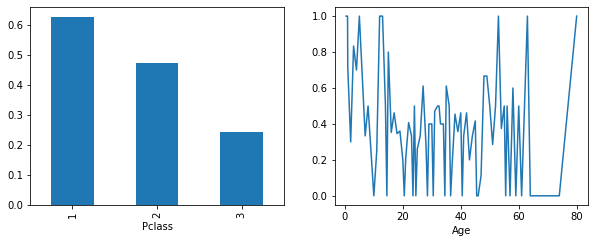

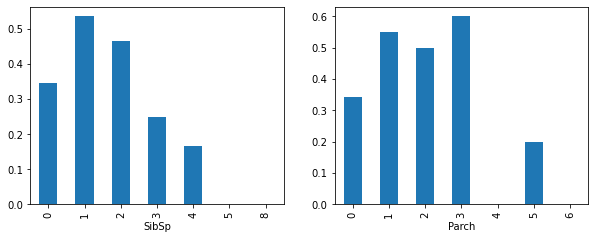

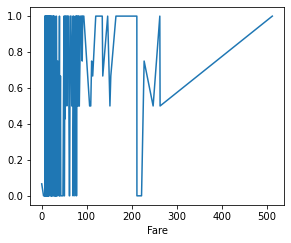

In [15]:
plt.figure(1) 
plt.subplot(221)
titanic_train_df.groupby('Pclass')['Survived'].mean().plot.bar(figsize=(10,8))

plt.subplot(222)
titanic_train_df.groupby('Age')['Survived'].mean().plot(figsize=(10,8))
plt.show()

plt.subplot(221)
titanic_train_df.groupby('SibSp')['Survived'].mean().plot.bar(figsize=(10,8))
plt.subplot(222)
titanic_train_df.groupby('Parch')['Survived'].mean().plot.bar(figsize=(10,8))
plt.show()

plt.subplot(221)
titanic_train_df.groupby('Fare')['Survived'].mean().plot(figsize=(10,8))
plt.show()




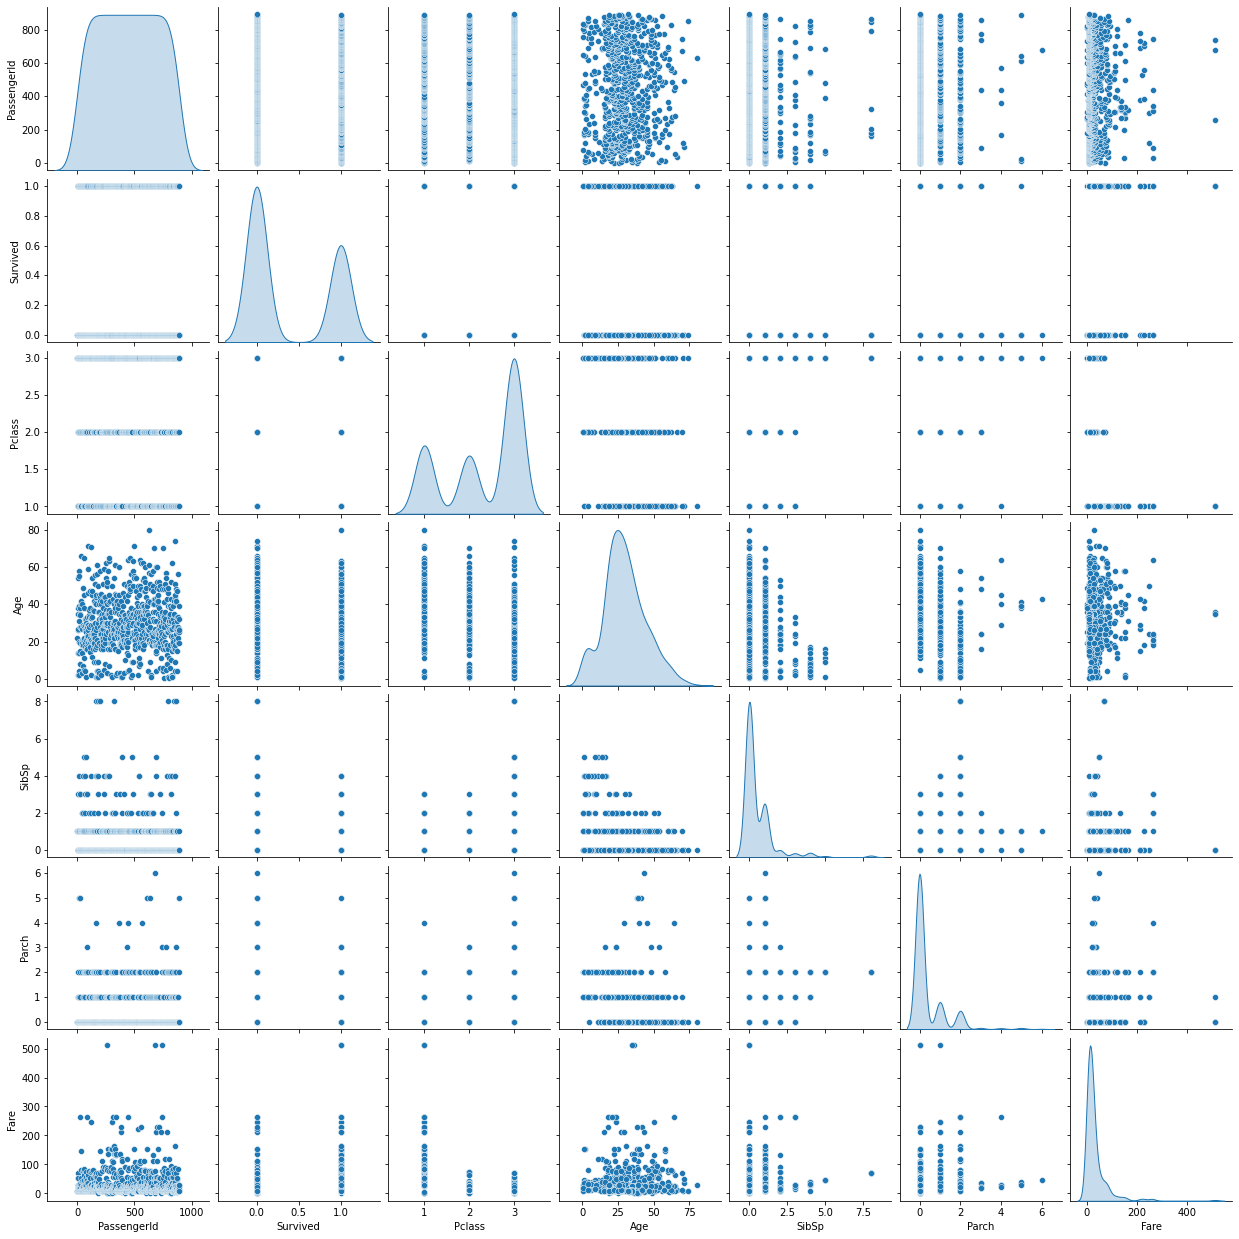

In [16]:
sns.pairplot(titanic_train_df ,diag_kind='kde')

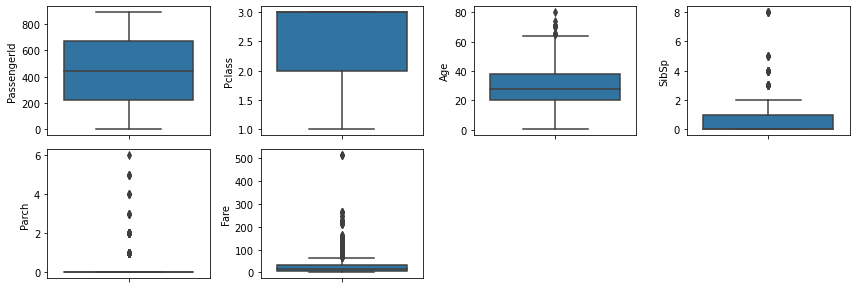

In [17]:

numerical_features = titanic_train_df.drop(['Survived','Name','Sex','Ticket','Embarked','Cabin'], axis=1).copy()
fig = plt.figure(figsize=(12,18))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=numerical_features.iloc[:,i])

plt.tight_layout()
plt.show()

# Preprocessing

In [18]:
# rearranging the columns :Moving the target column at begning,To make slicing easy between target and independent columns
 
titanic_train_df=titanic_train_df[['Survived','PassengerId','Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]

In [19]:
titanic_train_df.head(3)

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [20]:
#checking the Duplicate record in the datasets

print("duplicate values in train dataset:",titanic_train_df.duplicated().sum())



print("\nduplicate values in test dataset:",titanic_test_df.duplicated().sum())

duplicate values in train dataset: 0

duplicate values in test dataset: 0


In [21]:
#identifying missing values in train set

titanic_train_df.isna().sum()

Survived         0
PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
#percentage of missing values in each columns/features                          

titanic_train_df.isna().mean().round(4) * 100

Survived        0.00
PassengerId     0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [23]:
#identifying missing values in test set

titanic_test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [24]:
#percentage of missing values in each columns/features                          

titanic_test_df.isna().mean().round(4) * 100

PassengerId     0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            20.57
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.24
Cabin          78.23
Embarked        0.00
dtype: float64

In [25]:
#dropping the Cabin columns from Train and Test dataset as it conatins 78% of missing values 

titanic_train_df.drop(['Cabin'],axis=1 ,inplace=True)

titanic_test_df.drop(['Cabin'],axis=1 ,inplace=True)

In [26]:
# fill Missing values in Train Set
#fill missing values in numerical feature with median of  the column

titanic_train_df['Age'].fillna(titanic_train_df.Age.median(), inplace=True)

#fill missing values in catagorical feature with mode of the  column


titanic_train_df['Embarked'].fillna(titanic_train_df.Embarked.mode().iloc[0], inplace=True)

In [27]:
# fill Missing values in Test Set
,
#fill missing values in numerical feature with median of  the column

titanic_test_df['Age'].fillna(titanic_test_df.Age.median(), inplace=True)

titanic_test_df['Fare'].fillna(titanic_test_df.Fare.median(), inplace=True)

In [28]:
#checking if we have any missing values after the missing value treatments

titanic_train_df.isna().sum()

Survived       0
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [29]:
#Deleting  Name and Ticket feature as these are not making any inference in identifying the Traget feature

titanic_train_df.drop(['Name','Ticket'],axis=1 ,inplace=True)

titanic_test_df.drop(['Name','Ticket'],axis=1 ,inplace=True)

In [30]:
#creating dummy variables for the catagoraical variables

titanic_train_df=pd.get_dummies(titanic_train_df)
titanic_test_df=pd.get_dummies(titanic_test_df)

In [31]:
titanic_train_df.head()

,Survived,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,2,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,4,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,5,3,35.0,0,0,8.0500,0,1,0,0,1


In [32]:
#after creating dummy variable we are deleting the last column as those are not required .

titanic_train_df.drop(['Sex_male','Embarked_S'],axis=1 ,inplace=True)
titanic_test_df.drop(['Sex_male','Embarked_S'],axis=1 ,inplace=True)


In [33]:
titanic_train_df.head()

,Survived,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Embarked_C,Embarked_Q
0,0,1,3,22.0,1,0,7.2500,0,0,0
1,1,2,1,38.0,1,0,71.2833,1,1,0
2,1,3,3,26.0,0,0,7.9250,1,0,0
3,1,4,1,35.0,1,0,53.1000,1,0,0
4,0,5,3,35.0,0,0,8.0500,0,0,0


In [34]:
titanic_test_df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Embarked_C,Embarked_Q
0,892,3,34.5,0,0,7.8292,0,0,1
1,893,3,47.0,1,0,7.0000,1,0,0
2,894,2,62.0,0,0,9.6875,0,0,1
3,895,3,27.0,0,0,8.6625,0,0,0
4,896,3,22.0,1,1,12.2875,1,0,0


In [35]:
#dividing the target and independent features  of the dataset 
X = titanic_train_df.drop('Survived', axis=1)
Y = titanic_train_df[['Survived']]


In [36]:
#Split the data into training and validation set 

x_train, x_cv, y_train, y_cv = train_test_split(X, Y, test_size=0.1, random_state=0)

In [37]:
#Basic model building using Logistic regression

model = LogisticRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_cv)

print("Logistic Regression  algorithms Score",model.score(x_cv , y_cv))



# summarize the fit of the model

print(metrics.classification_report(y_cv, y_predict))

Logistic Regression  algorithms Score 0.7888888888888889
              precision    recall  f1-score   support

           0       0.81      0.82      0.82        51
           1       0.76      0.74      0.75        39

    accuracy                           0.79        90
   macro avg       0.79      0.78      0.78        90
weighted avg       0.79      0.79      0.79        90



The precision and recall for class 1 is low...

In [38]:
#- K Nearest Neighbours 

from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance')
NNH.fit(x_train, y_train)



print("KNN  algorithms Score",NNH.score(x_cv , y_cv))

# summarize the fit of the KNN model

print(metrics.classification_report(y_cv, y_predict))

KNN  algorithms Score 0.6222222222222222
              precision    recall  f1-score   support

           0       0.81      0.82      0.82        51
           1       0.76      0.74      0.75        39

    accuracy                           0.79        90
   macro avg       0.79      0.78      0.78        90
weighted avg       0.79      0.79      0.79        90



In [39]:
### let us check the effect of scaling (convert all dimensions to z scores)

x_train_scaled = preprocessing.scale(x_train)
x_cv_scaled = preprocessing.scale(x_cv)
NNH.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [40]:
predicted_labels = NNH.predict(x_cv_scaled)


print("KNN  algorithms Score",NNH.score(x_cv , y_cv))


# summarize the fit of the KNN model with Scaled data
print(metrics.classification_report(y_cv, predicted_labels))


KNN  algorithms Score 0.6222222222222222
              precision    recall  f1-score   support

           0       0.78      0.90      0.84        51
           1       0.84      0.67      0.74        39

    accuracy                           0.80        90
   macro avg       0.81      0.78      0.79        90
weighted avg       0.81      0.80      0.80        90



In [41]:
## scaled KNN algorithm gives the best result for class 1 till now. Let us check with Bossting and Bagging algorithms


In [42]:
#GradientBoost Classifier Algorithm
gradbst = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)
gradbst = gradbst.fit(x_train, y_train)

Y_gradbstpred = gradbst.predict(x_cv)



print("\n")
print("GradientBoost Classifier  algorithms Score :",gradbst.score(x_cv , y_cv))


# summarize the fit of the gradientBoost model
print(metrics.classification_report(y_cv, Y_gradbstpred))






GradientBoost Classifier  algorithms Score : 0.8333333333333334
              precision    recall  f1-score   support

           0       0.80      0.94      0.86        51
           1       0.90      0.69      0.78        39

    accuracy                           0.83        90
   macro avg       0.85      0.82      0.82        90
weighted avg       0.84      0.83      0.83        90



In [43]:
#Bagging Classifier Algorithm

bagcl = BaggingClassifier(n_estimators=10, max_samples= .7, bootstrap=True)
bagcl = bagcl.fit(x_train, y_train)

Y_bagclpred = bagcl.predict(x_cv)


print("\n")
print("Bagging Classifier algorithms Score :",bagcl.score(x_cv , y_cv))

# summarize the fit of the Bagging  model
print(metrics.classification_report(y_cv, Y_bagclpred))



Bagging Classifier algorithms Score : 0.8444444444444444
              precision    recall  f1-score   support

           0       0.80      0.96      0.88        51
           1       0.93      0.69      0.79        39

    accuracy                           0.84        90
   macro avg       0.87      0.83      0.83        90
weighted avg       0.86      0.84      0.84        90



In [44]:
# extreme gradient boosting Algorithm

xgbmodel = xgb.XGBClassifier(colsample_bylevel=0.9,
                              colsample_bytree=0.8,
                              gamma=0.99,
                              maxdepth=5,
                            min_child_weight=1,
                            n_estimators=10,
                            nthread=4,
                            random_state=2,
                            silent=True)
xgbmodel.fit(x_train, y_train)
print("\n")
print("Extreme Gradient Boosting algorithms Score :",xgbmodel.score(x_cv,y_cv))

Y_xgbpred = xgbmodel.predict(x_cv)

# summarize the fit of the xgboost model
print(metrics.classification_report(y_cv, Y_xgbpred))

[00:13:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { maxdepth, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:13:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Extreme Gradient Boosting algorithms Score : 0.8333333333333334
              precision    recall  f1-score   support

           0       0.81      0.92      0.86        51
           1       0.88      0.72      0.79        39

    accuracy                           0.83        90
   macro avg

Finalizing the model 

Xgboost model and gradient boost both are having same score  0.8333333333333334

precision ,Recall and F1 Score for class 1 is better for Xgboost model only  .

So we are considering the XGboost as our model to predict the Survival 

In [45]:
pred_xgb_test=xgbmodel.predict(titanic_test_df)


In [46]:
final_submit = pd.DataFrame({'PassengerId':titanic_test_df['PassengerId'],'Survived':pred_xgb_test})
final_submit


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [47]:
final_submit.to_csv('submission_titanic.csv',index=False)